# ACSE-3 (Numerical Methods) <a class="tocSkip">

## Coursework<a class="tocSkip">

# Instructions  <a class="tocSkip">
    

- This is the assessed coursework for module ACSE-3: Numerical Methods for year 2019/20.


- This is independent work, you cannot work in groups.


- Each question below is equally weighted in terms of marks.


- You will be assessed on both your code as well as your supporting descriptions/discussions of the results you obtain.


- You may use NumPy and SciPy. If you use an algorithm (e.g. from SciPy) not explicitly mentioned in the question, then please explain which algorithm you are using and why you have chosen it.


- You should submit your solutions as a single self-contained Jupyter notebooks via Github classroom - please submit a version where you have run all of the cells and all the outputs/plots etc are visible without me having to run the notebook myself.


<br><br>

# DEADLINE:   5pm Sunday 5 Jan 2020 <a class="tocSkip">

<br><br>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Coursework-Q1---Implement-RK2-family" data-toc-modified-id="Coursework-Q1---Implement-RK2-family-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Coursework Q1 - Implement RK2 family</a></span></li><li><span><a href="#Coursework-Q2---Implementing-backward-Euler-using-a-nonlinear-system-solver" data-toc-modified-id="Coursework-Q2---Implementing-backward-Euler-using-a-nonlinear-system-solver-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Coursework Q2 - Implementing backward Euler using a nonlinear system solver</a></span></li><li><span><a href="#Coursework-Q3---Steady-state-advection-diffusion-with-the-FEM" data-toc-modified-id="Coursework-Q3---Steady-state-advection-diffusion-with-the-FEM-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Coursework Q3 - Steady-state advection-diffusion with the FEM</a></span></li><li><span><a href="#Coursework-Q4---Time-dependent-advection-diffusion-with-the-FEM" data-toc-modified-id="Coursework-Q4---Time-dependent-advection-diffusion-with-the-FEM-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Coursework Q4 - Time-dependent advection-diffusion with the FEM</a></span></li></ul></div>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sl
import scipy.sparse as sp
import scipy.sparse.linalg as spla
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.animation as animation
from IPython.display import HTML
from pprint import pprint
import scipy.optimize
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Dejavu Sans']

# Coursework Q1 - Implement RK2 family

Write a function that implements the RK2 family of methods which takes in the free parameter $\alpha$ that appears in the most general **(1)** definition of RK2.

For example the first line of your function might read

```Python
def RK2_alpha(f, y0, t0, t_max, dt, alpha=0.5):
```

where `f` is a function of time and the solution $y$.

<br>

Perform some **(2)** verification tests of your function to confirm that with the choice $\alpha=1$ your implementation agrees with results from the improved Euler method which was implemented in lecture 5. 

<br>

Test for **(3)** convergence using several different values of $\alpha$ using the test problem with RHS and exact solutions given by the test case we saw in lecture 6:

$$ y' = y + t^3, \;\;\;\;\;\; y(0) = 1, $$  

which has the exact solution

$$ y(t) = 7\text{e}^t - t^3 - 3t^2 - 6t - 6. $$

You may make use of the following functions implementing these:

```python
def f(t, y):
    return y + t**3

def y_ex(t):
    return 7*np.exp(t) - t**3 - 3*t**2 - 6*t - 6
```

<br>

Consider a **simple error metric given by the error in the solution at time $t=3$**.

<br>

Plot your **(4)** convergence results, compared with results from the forward Euler and the improved Euler methods, and add to the graph your estimates for the order of convergence of each method.

<br>

Also, for a fixed time step size, **(5)** compute and plot how the error varies as a function of $\alpha$ for values in the range $[0.1,4.0]$.  

<br>

What is the optimal value of $\alpha$ which minimises the error for this problem?

### Q1.1 - Deriving the RK2 family

A Runge-Kutta method uses an intermediate step to increase accuracy by evaluating $f$ at locations within a time step.

The family of second-order Runge-Kutta schemes is given by:

\begin{align*}
k_1 & =  f(t_n, y_n), \\[10pt]
k_2 & =  f(t_n + \alpha \Delta t, y_n + \alpha\,\Delta t\, k_1), \\[10pt]
y_{n+1} &= y_n + \left( 1 - \frac{1}{2\alpha}\right)\, \Delta t\, k_1 + 
 \frac{1}{2\alpha} \, \Delta t\, k_2.
\end{align*}

This Runge-Kutta scheme is second-order accurate [n]. $\alpha$ can be considered a free parameter which can take any value. 

The choice $\alpha=1$ corresponds to the explicit trapezoidal (improved Euler) scheme, and $\alpha=1/2$ is the explicit midpoint scheme.

In [33]:
def f(t, y):
    """ ODE to be solved (Q1).
    """ 
    return y + t**3

def y_ex(t):
    """ Exact solution to Q1 ODE.
    t is the time interval
    """ 
    return 7*np.exp(t) - t**3 - 3*t**2 - 6*t - 6

def RK2_alpha(f, u0, t0, t_max, dt, alpha=0.5):
    """ RK2 family time-stepper.
    f = f(t,y) is the RHS function.
    u0 is the initial condition.
    t0 is the initial time; t_max is the end time.
    dt is the time step size.
    alpha can take any value and determines the RK2 scheme within the family (1 <=> improved Euler, 1/2 <=> explicit midpoint)
    """ 
    u = np.array(u0)
    t = np.array(t0)
    u_all = [u0]
    t_all = [t0] 
    while t < t_max:
        k1 = f(t, u)
        k2 = f(t + alpha*dt, u + dt*alpha*k1)
        u = u + (1-1/(2*alpha))*dt*k1 + 1/(2*alpha)*dt*k2
        u_all.append(u)
        t = t + dt
        t_all.append(t)
    return np.array(u_all), np.array(t_all)

def improved_euler(f, u0, t0, t_max, dt):
    """ Improved Euler time-stepper.
    f = f(t,y) is the RHS function.
    u0 is the initial condition.
    t0 is the initial time; t_max is the end time.
    dt is the time step size.
    """ 
    u = np.array(u0)
    t = np.array(t0)
    u_all = [u0]
    t_all = [t0]
    while t < t_max:
        k1 = f(t, u)
        k2 = f(t + dt, u + dt*k1)
        u = u + 1/2*dt*(k1 +k2)
        u_all.append(u)
        t = t + dt
        t_all.append(t)
    return np.array(u_all), np.array(t_all)

def forward_euler(f, u0, t0, t_max, dt):
    """ Forward Euler time-stepper.
    f = f(t,y) is the RHS function.
    u0 is the initial condition.
    t0 is the initial time; t_max is the end time.
    dt is the time step size.
    """ 
    u = np.array(u0)
    t = np.array(t0)
    u_all = [u0]
    t_all = [t0]
    while t < t_max:
        u = u + dt*f(t, u)  # euler guess
        u_all.append(u)
        t = t + dt
        t_all.append(t)
    return np.array(u_all), np.array(t_all)

### Q1.2 - Verification tests: RK2 family ($\alpha$ = 1) vs. Improved Euler 
For a choice of $\alpha = 1$, the RK2 family results in the following expressions:

\begin{align*}
k_1 & =  f(t_n, y_n), \\[10pt]
k_2 & =  f(t_n + \Delta t, y_n + \,\Delta t\, k_1), \\[10pt]
y_{n+1} &= y_n + \frac{1}{2}\Delta t\ ( k_1 +  k_2)
\end{align*}

Notice that this corresponds to the explicit trapezoidal (improved Euler) scheme.

The verification tests are implemented by asserting the results returned by RK2 ($\alpha = 1$) and the Improved Euler method implemented in L4. The expression evaluated by the assertion is generated by an "np.allclose" statement. 

### Verification test between RK2 ($\alpha = 1$) and Improved Euler (successful)

In [34]:
# set up
dt = 0.04
u0 = 1.0
t0 = 0.0
t_max = 3.0

#approximate solution using RK2 (a=1) and Improved euler
u_RK2, t_RK2 = RK2_alpha(f, u0, t0, t_max, dt, alpha = 1)
u_EUL, t_EUL = improved_euler(f, u0, t0, t_max, dt)

#test1 passes
assert np.allclose(u_RK2, u_EUL)

### Verification tests between RK2 ($\alpha \neq 1$) and Improved Euler fails  (unsuccessful)

In [35]:
#test2 fail (as expected) - alpha = 1.1
u_RK2, t_RK2 = RK2_alpha(f, u0, t0, t_max, dt, alpha = 1.1)
assert np.allclose(u_RK2, u_EUL)

AssertionError: 

In [36]:
#test2 fail (as expected) - alpha = 0.9
u_RK2, t_RK2 = RK2_alpha(f, u0, t0, t_max, dt, alpha = 0.9)
assert np.allclose(u_RK2, u_EUL)

AssertionError: 

### Solution plot

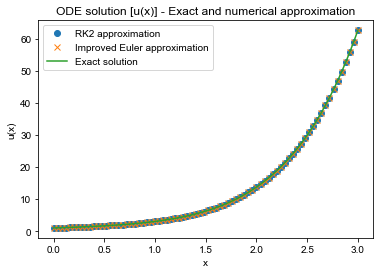

In [37]:
plt.figure()
#comute solution approximation with RK2 for a=1 again
u_RK2, t_RK2 = RK2_alpha(f, u0, t0, t_max, dt, alpha = 1)
plt.plot(t_RK2, u_RK2, 'o', label = "RK2 approximation")
plt.plot(t_EUL, u_EUL, 'x', label = "Improved Euler approximation") 
plt.title("ODE solution [u(x)] - Exact and numerical approximation")

# compute exact solution
t = np.linspace(t0, t_max, int(t_max/dt)+1)
y_exact = y_ex(t)
plt.plot(t, y_exact, label = "Exact solution")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.legend()

Qualitatively, both the RK2 and Improved Euler methods closely approach the analytical solution of this ODE. A convergence analysis is carried out below. 

### Q1.3 - Convergence of RK2 family for different values of $\alpha$ (in range [0.001, 10])

The convergence of the RK2 family as a function of changes in $\alpha$ is studied in the context of the following problem:

$$ y' = y + t^3, \;\;\;\;\;\; y(0) = 1, $$  

To test for convergence, the RK2 family approximation is compared to the exact solution, which is given by:

$$ y(t) = 7\text{e}^t - t^3 - 3t^2 - 6t - 6. $$

The exact solution remains unchanged, while the RK2 family approximation changes depending on  $\alpha$ (taking values in the range [0.001, 10]).

A simple error metric given by the error (difference between the exact and the numerical solutions) in the solution at time $t=3$ is studied. 

Text(0.5,0,'alpha')

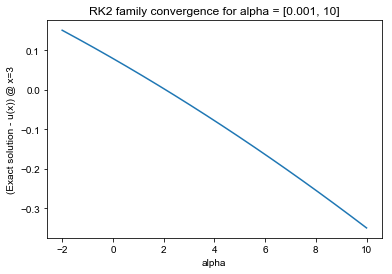

In [38]:
y_exact = y_ex(t)
alpha_range = np.linspace(1-3, 10, 20)
distance_RK2 = []

# compute difference between exact solution and RK2 approximation for different values of alpha
for i in alpha_range:
    u_RK2, t_RK2 = RK2_alpha(f, u0, t0, t_max, dt, alpha = i)
    distance_RK2.append(y_exact[-1]-u_RK2[-1])
    
plt.plot(alpha_range, distance_RK2)
plt.title("RK2 family convergence for alpha = [0.001, 10]")
plt.ylabel("(Exact solution - u(x)) @ x=3")
plt.xlabel("alpha")

The plot above suggests that values of around $\alpha > 2$ over-approximate the solution, while values of around $\alpha < 2 $ under-estimate it. 

### Q1.4 - Convergence of RK2 family, forward Euler and Improved Euler for different $\Delta t$ 

The rate of convergence of the RK2 family (with a value of $\alpha=2$, as per the previous section), forward Euler and improved Euler methods is studied. This is done by considering the error in the approximation by changing $\Delta t$ in the range [0.0001, 1].

The difference between the analytical solution and the numerical approximation at t=3 is measured. 

Lastly, the order of convergence of each method is estimated. The order of convergence of forward Euler is known to be of 1, and that of improved Euler of 2 [1]. The order of convergence of the RK2 family depends on the choice of $\alpha$. The maximum order of convergence that can be achieved by the RK2 family is 2, if a certain value of $\alpha$ is picked. The calculations from the previous section suggest that such a value of $\alpha$ might be 2. 

Text(0,0.5,'(Exact solution - u(x)) @ x=3')

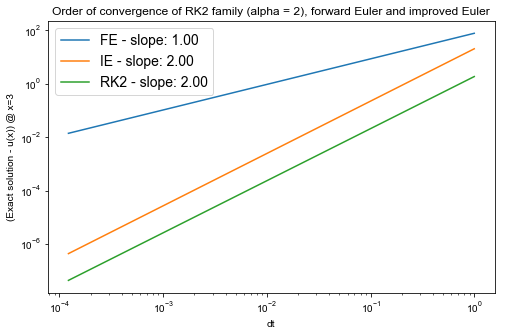

In [8]:
# problem parameters
dt = 0.04
u0 = 1.0
t0 = 0.0

def convergence_order(x_data, y_data):
    """  Gets np array in logarithmic form, calculates the slope at each interval and returns its last value""" 
    dx = np.diff(x_data)
    dy = np.diff(y_data)
    slope = dy/dx
    return slope[-1]

def approx_error(dt, t_max):
    """ For a given dt (time step) and t_max (maximum time), 
    it calculates the difference between the numerical approximation and
    the analytical solution. It does so for forward Euler, improved Euler and 
    RK2 (alpha = 2)""" 
    uall, tall = forward_euler(f, u0, t0, t_max, dt)
    err1 = abs(uall[-1]-y_ex(t_max))
    uall, tall = improved_euler(f, u0, t0, t_max, dt)
    err2 = abs(uall[-1]-y_ex(t_max))
    uall, tall = RK2_alpha(f, u0, t0, t_max, dt, alpha = 2)
    err3 = abs(uall[-1]-y_ex(t_max))
    return err1, err2, err3


error_fe = []
error_ie = []
error_rk = []
dt_array = []
dt = 1

# calculate approximation error for exponentially decreasing dt
while dt > 1.e-4:
    dt_array.append(dt)
    err1, err2, err3 = approx_error(dt, 3)
    error_fe.append(err1)
    error_ie.append(err2)
    error_rk.append(err3)
    dt *= 0.5
    
start_fit = 1
# set up figure
fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))
line_fit_fe = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_fe[start_fit:]), 1)
line_fit_ie = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_ie[start_fit:]), 1)
line_fit_rk = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_rk[start_fit:]), 1)
ax1.loglog(dt_array, np.exp(line_fit_fe[1]) * dt_array**(line_fit_fe[0]), label = 'FE - slope: {:.2f}'.format(convergence_order(np.log(dt_array), np.log(error_fe))))
ax1.loglog(dt_array, np.exp(line_fit_ie[1]) * dt_array**(line_fit_ie[0]),  label = 'IE - slope: {:.2f}'.format(convergence_order(np.log(dt_array), np.log(error_ie))))
ax1.loglog(dt_array, np.exp(line_fit_rk[1]) * dt_array**(line_fit_rk[0]),  label = 'RK2 - slope: {:.2f}'.format(convergence_order(np.log(dt_array), np.log(error_rk))))

ax1.legend(loc='best', fontsize=14);
plt.title("Order of convergence of RK2 family (alpha = 2), forward Euler and improved Euler")
plt.xlabel("dt")
plt.ylabel("(Exact solution - u(x)) @ x=3")

For the RK2 family, a value of $\alpha$ leads to the method's maximum order of convergence, of 2. The forward euler and improved Euler methods converge at the expected rate (1 and 2, respectively). 
Furthermore, the plot above shows how RK2 achieves a more accurate approximation than improved Euler (for a fixed dt). This means that (for $\alpha$ = 2) RK2 converges to a more accurate result as fast as improved Euler does.

### Q1.5 - Error variations using RK2 family approximation with different $\alpha$ (in range [0.1, 4]). Calculation of optimal $\alpha$ which minimises the error for this problem. 

The calculation of the error variations using the RK2 family approximation with different $\alpha$ values is approached as in Q1.3. This time, however, the absolute value of the difference between the numerical approximation and the exact solution is calculated. 

The optimal value of $\alpha$ which minimises the error for this problem is also calculated.

The value that minimises the numerical error at x=3 is 2.01


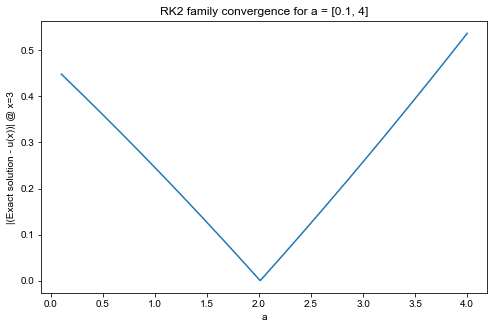

In [39]:
#def f(t, u):
#    val = u
#    return val

# problem parameters
dt = 0.04
u0 = 1.0
t0 = 0.0

# set up figure
fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))


def approx_error(a):
    uall, tall = RK2_alpha(f, u0, t0, 3, 0.1, alpha = a)
    err3 = abs(y_ex(t_max)-uall[-1])
    return err3


error_fe = []
error_ie = []
error_rk = []
dt_array = []
dt = 1
alpha_range = np.linspace(0.1, 4, 1000)
for i in alpha_range:
    err3 = approx_error(i)
    error_rk.append(err3)
ax1.plot(alpha_range, error_rk)
plt.title("RK2 family convergence for a = [0.1, 4]")
plt.ylabel("|(Exact solution - u(x))| @ x=3")
plt.xlabel("a")

#find optimal value that minimises error
pos = np.where(np.amin(error_rk) == error_rk)
print("The value that minimises the numerical error at x=3 is {:.2f}".format(alpha_range[int(pos[0])]))

The plot above suggests that a value of approximately $\alpha = 2.01$ minimises the error from the RK2 approximation for this particular problem. 

# Coursework Q2 - Implementing backward Euler using a nonlinear system solver

In the lecture 5 homework (question "circular orbits") we considered the vector ODE problem

\begin{align*}
\dot{x} & = -y, \\[5pt] 
\dot{y} & = x
\end{align*} 

with initial conditions $x(0)=1,\; y(0)=0$.  

We saw in that homework question how the forward and improved Euler methods performed on this problem.

Recall that the exact solution's trajectory in $(x,y)$ space should map out a circle, but forward Euler's orbit was found to rapidly increase in diameter.

<br> 

**(1)** Write a function to implement the backward Euler scheme for a generic RHS vector function $\boldsymbol{f}$. 

To do this you will need to call a **(1)** nonlinear system solver, make use of one of the ones that we saw in lecture 4.

<br>

Run your code for the above problem and comment on the **(3)** qualitative differences between your solution obtained with backward Euler with that obtained using forward Euler.

<br>

Based on your observations **(2)** implement another implicit two-level scheme which should provide qualitatively improved results compared with both forward and backward Euler. 

<br>

Given that the exact solution maps out a circle, consider what **(4)** mathematical conservation law (a function of the solution variables that should be constant) the solution should respect and check how well each of your methods performs at satisfying this law.

### Q2.1 - Non-linear solver and Backward Euler implementation

The backward Euler (or implicit Euler) method is derived by performing a backward difference:

$$\frac{y_{n+1} - y_{n}}{\Delta t} = {f}(t_{n+1},{y}_{n+1}) \;\;\; \iff \;\;\; y_{n+1} - {\Delta t}\,{f}(t_{n+1},{y}_{n+1}) = y_{n} \;\;\; \iff \;\;\; y_{n+1} = y_{n} + {\Delta t}\,{f}(t_{n+1},{y}_{n+1}) $$ 

The equation for $y_{n+1}$ is implicit. This creates the need to use a root finding algorithm (which for generality purposes, can be implemented via a nonlinear solver).  

The Backward Euler method is implemented in two different ways. 

1. Using Scipy's non-linear solver (scipy.optimize.fsolve) and a lambda function: It has been implemented through the function "backward_euler" and follows the same format as "forward_euler" and "improved_euler". It can be used in the same way. This implementation has been used for testing purposes. The RHS to be solved is contained in the function "f1(t, u)".


2. Using own implementation of Newton's method: A generic function called "nonlinear_solver" takes in a function corresponding to the ODE solving method and a function that contains the ODE system to be solved. Backward Euler is implemented by passsing "solve_backward" to "nonlinear_solver". The function "nonlinear solver" uses Newton's method ("newton_system_numdif") to solve an implicit system. The RHS to be solved is contained in the function "f2(u)".

In [10]:
def jacobian(f, x, t, x0, dt, dx, f2):
    """ Compute the Jacobian matrix
    """
    J = np.zeros((len(x), len(x)))
    f0 = f(x, t, f2, x0, dt) #solve...
    for j in range(len(x)):
        # always start from x
        x_inc = x.copy()
        # increment only the j-th entry by dx
        x_inc[j] +=  dx
        # evaluate f at this incremented x
        f1 = f(x_inc, t, f2, x0, dt)
        # numerical derivative, place the vector result 
        # in the appropriate column of J        
        J[:,j] = (f1 - f0)/dx
    return J
    
    
def newton_system_numdif(f, x, t, x0, dt, f2, h=1.0e-4, atol=1.0e-6, max_its=100):  
    """ Solve the problem f(x)=0 using a numerically computed Jacobian 
    with a step size of h, and use Scipy to solve the linear system
     J \Delta x = -f(x)   at each iteration
    """
    for it in range(max_its-1):
        J = jacobian(f, x, t, x0, dt, h, f2)
        dx = sl.solve(J, -f(x, t, f2, x0, dt))
        x += dx
        if sl.norm(dx, np.inf) < atol:
            #print(x, it+1)
            return x, it+1
    print('Hit max_its without converging')

def nonlinear_solver(f,u0, t0,t_max, dt, f2):
    """ Nonlinear root finding
    f is the equation to solve 
    u0 is an array containing the initial conditions
    t0 is the initial time 
    t_max is the maximum interval
    dt is the time step
    f2 is a function that describes the ODE solving method
    """
    u = np.array(u0)
    t = np.array(t0)
    u_all = [u0]
    t_all = [t0]
    t=t0
    y=u0
    while t<t_max:
        y, i = newton_system_numdif(f, u0, t, y, dt, f2)
        u_all.append(y)
        t= t+dt
        t_all.append(t)
    return np.array(u_all), np.array(t_all)

def f2(u): 
    """ODE to be solved 
    """
    f = np.zeros_like(u)
    f[0] = -u[1]
    f[1] =  u[0]   
    return f


def solve_backward(x, t, f2, x0, dt):
    """Backward Euler function to be passed to 'nonlinear_solver'
    """
    return x - dt*f2(x)-x0

def backward_euler(f,u0, t0,t_max, dt):
    # UNUSED - Left for testing 
    # uses Scipy's optimise
    u = np.array(u0)
    t = np.array(t0)
    u_all = [u0]
    t_all = [t0]
    t=t0
    y=u0
    while t<t_max:
        result =scipy.optimize.fsolve(lambda x:x-y-dt*f(t, x), y)  
        u_all.append(result)
        t= t+dt
        t_all.append(t)
        y=result
    return np.array(u_all), np.array(t_all)

### Q2.2 - Alternative implicit two-level scheme

An obvious alternative implicit two-level scheme is the implicit trapezoidal. This method can be derived by adding the forward and backward Euler schemes. This results in a cancellation of some of their errors. It is derived as follows:

\begin{align*}
\frac{y_{n+1} - y_{n}}{\Delta t} & = \frac{1}{2}\left({f}(t_{n},{y}_{n}) + {f}(t_{n+1},{y}_{n+1})\right) \\[5pt] 
\iff \;\;\;  
 y_{n+1} - \frac{\Delta t}{2}{f}(t_{n+1},{y}_{n+1}) & =  y_{n} + \frac{\Delta t}{2}{f}(t_{n},{y}_{n}),
 \end{align*}


The Implicit Trapezoidal method is implemented in two different ways. 

1. Using Scipy's non-linear solver (scipy.optimize.fsolve) and a lambda function: It has been implemented through the function "implicit_trapezoidal" and follows the same format as "forward_euler" and "improved_euler". It can be used in the same way. This implementation has been used for testing purposes. The RHS to be solved is contained in the function "f1(t, u)".

2. Using own implementation of Newton's method: A generic function called "nonlinear_solver" takes in a function corresponding to the ODE solving method and a function that contains the ODE system to be solved. Implicit Trapezoidal is implemented by passsing "solve_trapezoid" to "nonlinear_solver". The function "nonlinear solver" uses Newton's method ("newton_system_numdif") to solve an implicit system. The RHS to be solved is contained in the function "f2(u)".

In [11]:
def solve_trapezoid(x, t, f2, x0, dt):
    """Implicit Trapezoidal function to be passed to 'nonlinear_solver'
    """    
    return x - 1/2*dt*(f2(x) + f2(x0))-x0

def implicit_trapezoidal(f,u0, t0,t_max, dt):
    # UNUSED - Left for testing 
    # uses Scipy's optimise
    u = np.array(u0)
    t = np.array(t0)
    u_all = [u0]
    t_all = [t0]
    t=t0
    y=u0
    rem = dt/2*f(t, y)
    while t<t_max:
        result =scipy.optimize.fsolve(lambda x:x-y-dt/2*f(t, x)-rem, y)     
        u_all.append(result)
        t= t+dt
        t_all.append(t)
        y=result
        rem = dt/2*f(t, y)
    return np.array(u_all), np.array(t_all)

### Q2.3 - ODE system solution and qualitative differences

The circular orbits problem is solved below using the Forward Euler, Improved Euler, Backward Euler and Implicit Trapezoidal methods. The qualitative differences in these approaches are discussed below.

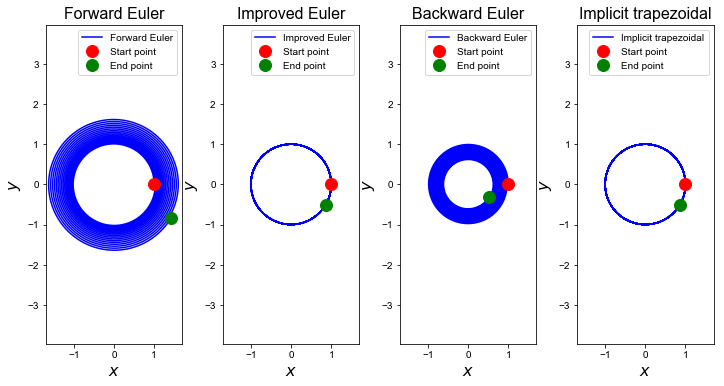

In [12]:
def f1(t, u): 
    """ODE to be solved
    """    
    f = np.zeros_like(u)
    f[0] = -u[1]
    f[1] =  u[0]   
    return f

# problem parameters
dt = 0.01
u0 = [1.,0.]
t0 = 0.0
tf = 100

# set up figure
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10, 5))
fig.tight_layout(w_pad=1)

# forward euler approximation and plot
u, t = forward_euler(f1, u0, t0, tf, dt)
ax1.plot(u[:,0], u[:,1], 'b', label='Forward Euler')
ax1.plot(u[0,0], u[0,1], 'ro', label='Start point', markersize=12)
ax1.plot(u[-1,0], u[-1,1], 'go', label='End point', markersize=12)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$y$', fontsize=16)
ax1.set_title('Forward Euler', fontsize=16)
ax1.axis('equal')
ax1.legend(loc='best', fontsize=10)
ax1.set_xlim(-1.7,1.7)
ax1.set_ylim(-1.7,1.7)

# improved euler approximation and plot
u, t = improved_euler(f1, u0, t0, tf, dt)
ax2.plot(u[:,0], u[:,1], 'b', label='Improved Euler')
ax2.plot(u[0,0], u[0,1], 'ro', label='Start point', markersize=12)
ax2.plot(u[-1,0], u[-1,1], 'go', label='End point', markersize=12)
ax2.set_xlabel('$x$', fontsize=16)
ax2.set_ylabel('$y$', fontsize=16)
ax2.set_title('Improved Euler', fontsize=16)
ax2.axis('equal')
ax2.legend(loc='best', fontsize=10)
ax2.set_xlim(-1.7,1.7)
ax2.set_ylim(-1.7,1.7);

# backward euler approximation and plot
u, t = nonlinear_solver(solve_backward,u0, t0, tf, dt, f2)
ax3.plot(u[:,0], u[:,1], 'b', label='Backward Euler')
ax3.plot(u[0,0], u[0,1], 'ro', label='Start point', markersize=12)
ax3.plot(u[-1,0], u[-1,1], 'go', label='End point', markersize=12)
ax3.set_xlabel('$x$', fontsize=16)
ax3.set_ylabel('$y$', fontsize=16)
ax3.set_title('Backward Euler', fontsize=16)
ax3.axis('equal')
ax3.legend(loc='best', fontsize=10)
ax3.set_xlim(-1.7,1.7)
ax3.set_ylim(-1.7,1.7);

# implicit trapezoidal approximation and plot
u, t = nonlinear_solver(solve_trapezoid,u0, t0, tf, dt, f2)
ax4.plot(u[:,0], u[:,1], 'b', label='Implicit trapezoidal')
ax4.plot(u[0,0], u[0,1], 'ro', label='Start point', markersize=12)
ax4.plot(u[-1,0], u[-1,1], 'go', label='End point', markersize=12)
ax4.set_xlabel('$x$', fontsize=16)
ax4.set_ylabel('$y$', fontsize=16)
ax4.set_title('Implicit trapezoidal', fontsize=16)
ax4.axis('equal')
ax4.legend(loc='best', fontsize=10)
ax4.set_xlim(-1.7,1.7)
ax4.set_ylim(-1.7,1.7);

The ODE solution plots above show how the orbit changes as a function of time. The solution to this problem is expected to be a circular orbit. Both the Improved Euler and Implicit Trapezoidal methods seem to converge to the expected solution. 

However, the Forward Euler solution plot shows how the radius of the orbit grows with time, diverging away from the solution. 

On the other hand, the Backward Euler solution plot shows how the radius of the orbit decreases with time, diverging away from the solution (ultimately, for a large enough time, it wrongly converges to 0).

Qualitatively, it seems intuitive that a method that combines Forward and Backward Euler (such as Implicit Trapezoid) would perform better. The rate at which the Forward Euler approximation diverges out of the circle (expected solution) is the same as the rate at which the Backward Euler approximation diverges into the centre of the circle. Therefore, their errors cancel out. 

### Q2.4 - Conservation Law

The solution to the ODE system results in a circular orbit. The velocity of a body moving along this orbit must be constant.  The specific orbital energy of two orbiting bodies is the constant sum of their mutual potential energy and their total kinetic energy, divided by the reduced mass [3]. It is given by:

$$\epsilon = \frac{v^2}{2} - \frac{G(m_1+m_2)}{r}$$

Where:
- $\epsilon$ is the specific orbital energy.
- $v$ is the relative orbital speed.
- $G(m_1+m_2)$ is the sum of the standard gravitational parameters of the bodies. 
- $r$ is the orbital distance between the bodies. 

According to the orbital energy conservation equation, the specific orbital energy ($\epsilon$) does not vary with time. This results from the principle of conservation of mechanical energy which applies when the only force acting on an object is its own weight [2].

It states that energy can be transformed from kinetic energy into potential energy, but that the total amount remains the same: mechanical energy is conserved. 

In the context of our numerical approximation, the only parameter that affects the specific orbital energy and that changes depending on the numerical method of choice is the radius. The radius changes as a function of time according to:

$$ r(t) := \sqrt{x(t)^2 + y(t)^2} $$

According to the specific orbital energy conservation law stated above, the changes in the radius with time must be of zero. This is equivalent to having the radius at any time being equal to the radius at t = 0:

$$ r(t) := \sqrt{x(t)^2 + y(t)^2} = r(0), $$

The changes in the radius as a function of time are studied to determine the correctness of the numerical methods used to approximate the solution. The results are discussed below.

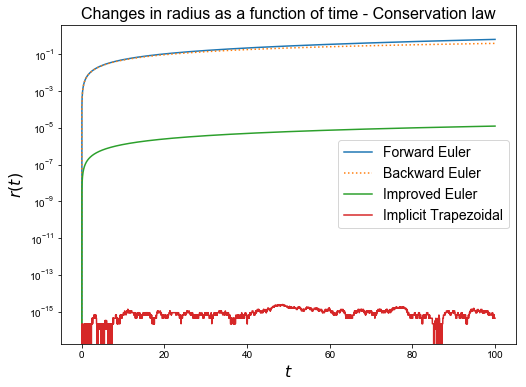

In [13]:
# set up figure
fig, ax1 = plt.subplots(1, 1, figsize=(7, 5))
fig.tight_layout(w_pad=4)
ax1.set_xlabel('$t$', fontsize=16)
ax1.set_ylabel('$r(t)$', fontsize=16)
ax1.set_title('Changes in radius as a function of time - Conservation law', fontsize=16)

tf = 100

# forward euler approximation and r(t) computation
u, t = forward_euler(f1, u0, t0, tf, dt)
ax1.semilogy(t, np.abs(np.sqrt(u[:,0]**2 + u[:,1]**2) - np.sqrt(u[0,0]**2 + u[0,1]**2)),   label='Forward Euler')

# backward euler approximation and r(t) computation
u, t = backward_euler(f1, u0, t0, tf, dt)
ax1.semilogy(t, np.abs(np.sqrt(u[:,0]**2 + u[:,1]**2) - np.sqrt(u[0,0]**2 + u[0,1]**2)), ':', label='Backward Euler')

# improved euler approximation and r(t) computation
u, t = improved_euler(f1, u0, t0, tf, dt)
ax1.semilogy(t, np.abs(np.sqrt(u[:,0]**2 + u[:,1]**2) - np.sqrt(u[0,0]**2 + u[0,1]**2)),  label='Improved Euler')

# implicit trapezoidal approximation and r(t) computation
u, t = implicit_trapezoidal(f1, u0, t0, tf, dt)
ax1.semilogy(t, np.abs(np.sqrt(u[:,0]**2 + u[:,1]**2) - np.sqrt(u[0,0]**2 + u[0,1]**2)), label='Implicit Trapezoidal')

# initial condition
state0 = np.array([1.0, 1.0, 1.0])

t = np.arange(t0, tf, dt)
# solve using odeint
ax1.legend(loc='best', fontsize=14);

The plot above aligns with the plots obtained in Q2.3. 

- Improved Euler and Implicit Trapezoidal:
For Improved Euler, the changes in the radius as a function of time are very small ($10^{-6}$) and stop after a long enough time.
For Implicit Trapezoidal, the changes in the radius are even smaller. In fact, they are so small that the plot shows a very noisy behaviour. This is a result of the closeness between the change in radius and machine precision (around $10^{-15}$).


- Forward and Backward Euler: 
The changes in the radius are not negligible as for the two methods above. In particular:
For Forward Euler, the radius keeps growing away from the circle. This matches the positive slope of the blue line. 
For Backward Euler, the radius keeps decreasing into the centre of the circle. For a long enough time, the radius eventually becomes zero, resulting in the orange line flattening out. This can be observed in the plot below for a t = 500. 

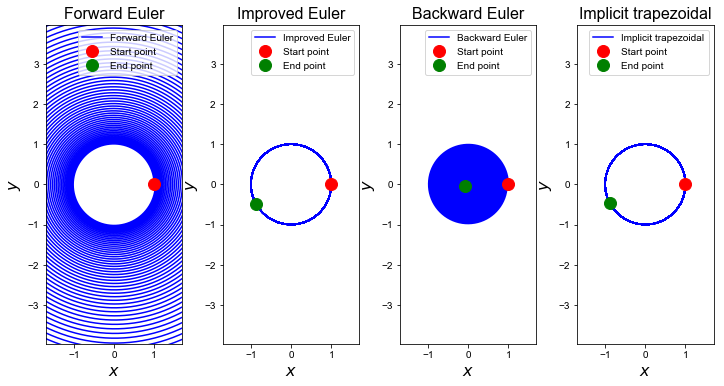

In [14]:
# problem parameters
dt = 0.01
u0 = [1.,0.]
t0 = 0.0
tf = 500.

# set up figure
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10, 5))
fig.tight_layout(w_pad=1)

# forward euler approximation and plot
u, t = forward_euler(f1, u0, t0, tf, dt)
ax1.plot(u[:,0], u[:,1], 'b', label='Forward Euler')
ax1.plot(u[0,0], u[0,1], 'ro', label='Start point', markersize=12)
ax1.plot(u[-1,0], u[-1,1], 'go', label='End point', markersize=12)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$y$', fontsize=16)
ax1.set_title('Forward Euler', fontsize=16)
ax1.axis('equal')
ax1.legend(loc='best', fontsize=10)
ax1.set_xlim(-1.7,1.7)
ax1.set_ylim(-1.7,1.7)

# improved euler approximation and plot
u, t = improved_euler(f1, u0, t0, tf, dt)
ax2.plot(u[:,0], u[:,1], 'b', label='Improved Euler')
ax2.plot(u[0,0], u[0,1], 'ro', label='Start point', markersize=12)
ax2.plot(u[-1,0], u[-1,1], 'go', label='End point', markersize=12)
ax2.set_xlabel('$x$', fontsize=16)
ax2.set_ylabel('$y$', fontsize=16)
ax2.set_title('Improved Euler', fontsize=16)
ax2.axis('equal')
ax2.legend(loc='best', fontsize=10)
ax2.set_xlim(-1.7,1.7)
ax2.set_ylim(-1.7,1.7);

# backward euler approximation and plot
u, t = nonlinear_solver(solve_backward,u0, t0, tf, dt, f2)
ax3.plot(u[:,0], u[:,1], 'b', label='Backward Euler')
ax3.plot(u[0,0], u[0,1], 'ro', label='Start point', markersize=12)
ax3.plot(u[-1,0], u[-1,1], 'go', label='End point', markersize=12)
ax3.set_xlabel('$x$', fontsize=16)
ax3.set_ylabel('$y$', fontsize=16)
ax3.set_title('Backward Euler', fontsize=16)
ax3.axis('equal')
ax3.legend(loc='best', fontsize=10)
ax3.set_xlim(-1.7,1.7)
ax3.set_ylim(-1.7,1.7);

# implicit trapezoidal approximation and plot
u, t = nonlinear_solver(solve_trapezoid,u0, t0, tf, dt, f2)
ax4.plot(u[:,0], u[:,1], 'b', label='Implicit trapezoidal')
ax4.plot(u[0,0], u[0,1], 'ro', label='Start point', markersize=12)
ax4.plot(u[-1,0], u[-1,1], 'go', label='End point', markersize=12)
ax4.set_xlabel('$x$', fontsize=16)
ax4.set_ylabel('$y$', fontsize=16)
ax4.set_title('Implicit trapezoidal', fontsize=16)
ax4.axis('equal')
ax4.legend(loc='best', fontsize=10)
ax4.set_xlim(-1.7,1.7)
ax4.set_ylim(-1.7,1.7);

# Coursework Q3 - Steady-state advection-diffusion with the FEM


In this part of the question we want to solve steady-state advection-diffusion using the (non-local-assembly based) finite element approach we developed in lecture 11.



Using the finite element method
**(1)** formulate and solve the steady-state advection-diffusion (boundary value) problem with Dirichlet boundary conditions we considered in lecture 7 (the exact solution to which is given below).

$$U\frac{\partial c}{\partial x} = \kappa\frac{\partial^2 c}{\partial x^2}, \;\;\;\; c(0) = 0, \;\;\;\; c(L)=c_E, $$

The difference to what we've seen before in our FEM codes is that you now need to **(1)** discretise the advection term, which ultimately involves integrating basis functions multiplied by their derivatives over elements.

[**Hint:** *your starting point for this might be the code we wrote in lecture 11 section 5.4 ("Dealing with more complex BCs (Inhomogeneous Dirichlet)"). You need to add in an extra contribution to the LHS corresponding to advection (cf. L11 homework 1.4 where we ended up adding a mass matrix when we solved the problem $u''+u=f$).  You will need to remember to also add in the appropriate extra advection related RHS terms corresponding to the boundary contributions (as was explained in the context of diffusion in section 5.4.2 of lecture 11).*]

<br>

Verify your implementation with a **(2)** convergence with $\Delta x$ analysis using the exact solution given by
```Python
def u_exact(x):
    return CE * (np.exp(Pe * x / L) - 1) / (np.exp(Pe) - 1)
```
You can use the following parameters (using the notation of lecture 7)
```Python
kappa = 0.005
L = 1
Pe = 10
U = Pe * kappa / L
CE = 1
```
where `CE` is the Dirichlet BC value at the right hand boundary, the left hand boundary being a homogeneous Dirichlet condition.



<br>

**(2)** Do you observe the expected order of convergence?

<br>

Finally, **(2)** compare the errors in your solution against a corresponding finite difference solver. You may re-use code from lecture 7 for this. What do you observe?

<br>

Throughout this question you may assume for simplicity a uniform mesh.

###  Steady-state advection-diffusion with Dirichlet boundary conditions via finite element method 

The aim is to solve steady-state advection-diffusion (below) using the (non-local-assembly based) finite element approach we developed in lecture 11.

$$U\frac{\partial c}{\partial x} = \kappa\frac{\partial^2 c}{\partial x^2}, \;\;\;\; c(0) = 0, \;\;\;\; c(L)=c_E, $$


More generally, this continuous equation can be expressed as:

$$u'-u'' = f.$$

To discretise it, the first step is to find an approximation from within a finite dimensional space that is as close as possible to the true solution. The aim is to find a function $u\in V$ such that for all $v\in V$

$$\int_I \,(u'-u'')\,v\,dx = \int_I \,f\,v\,dx,$$

this satisfies the equation in a weak sense [1].

The next step is to replace the infinite dimensional $V$ with a finite dimensional $V_h$.

In practice we write the solution as: 

$$u \approx u_h := \sum_{j=0}^n u_j \phi_j(x).$$


<br>

To solve this discretised problem, find $u_h\in V_h$ (or equivalently find the weights $u_j$, $j=0,\ldots n$) such that:

$$\int_I \,(u_h'-u_h'')\,\phi_i\,dx = \int_I \,f\,\phi_i\,dx, \;\;\;\;\text{for}\;\;\;\; i=0,\ldots,n.$$

$$\int_I \,u_h'\,\phi_i\,dx - \int_I \,u_h''\,\phi_i\,dx = \int_I \,f\,\phi_i\,dx, \;\;\;\;\text{for}\;\;\;\; i=0,\ldots,n.$$

Using a change of variables and ignoring the boundary term, this leads to:

$$\int_0^1 \,u_h'\,\phi_i\,dx - \int_0^1 \,u_h'\,\phi'_i\,dx = \int_0^1 \,f\,\phi_i\,dx, \;\;\;\;\text{for}\;\;\;\; i=0,\ldots,n.$$


The integrals in the LHS can be respectively written as:

\begin{align*}
\int_0^1 u_h'\phi_i' \,dx 
&= 
\int_0^1 \left(\sum_{j=0}^{n} u_j\,\phi_j'\right)\phi_i' \,dx \\[10pt]
&= 
\sum_{j=0}^{n} u_j\, \int_0^1 \phi_j'\, \phi_i' \,dx.
\end{align*}


\begin{align*}
\int_0^1 u_h'\phi_i \,dx 
&= 
\int_0^1 \left(\sum_{j=0}^{n} u_j\,\phi_j'\right)\phi_i \,dx \\[10pt]
&= 
\sum_{j=0}^{n} u_j\, \int_0^1 \phi_j'\, \phi_i \,dx.
\end{align*}

The notation for the "discretisation" and "advection" matrices is now introduced:

$$ K_{ij} = \int_0^1 \phi_j'\, \phi_i' \,dx, \;\;\;\;\; \text{for}\;\;\;\; i, \, j=0, 1,\ldots, n,$$

$$ A_{ij} = \int_0^1 \phi_j'\, \phi_i \,dx, \;\;\;\;\; \text{for}\;\;\;\; i, \, j=0, 1,\ldots, n,$$

and the RHS vector

$$ b_i = \int_0^1 f\, \phi_i \,dx, \;\;\;\;\; \text{for}\;\;\;\; i = 0, 1,\ldots, n.$$

The discretised system can now be written as: 
 
$$\sum_{j=0}^{n} u_j (A_{ij}+K_{ij}) = b_i \equiv (A+K)u = b$$

Solving this matrix equation for the vector of coefficients u, leads to a numerical solution to the problem.

The stiffness matrix was derived in L11 [1]. Similarly, the advection matrix is derived below:

Firstly, the main diagonal:

\begin{align*}
A_{ii} 
&= \int_0^1 \phi_i'\, \phi_i \,dx 
\\[10pt]
&= 
\int_{x_{i-1}}^{x_i} \phi_i'\, \phi_i \,dx + \int_{x_{i}}^{x_{i+1}} \phi_i'\, \phi_i \,dx
\\[10pt]
&= \int_{x_{i-1}}^{x_i} \frac{x-x_{i-1}}{\Delta x_{i-1}^2}\,dx - \int_{x_{i}}^{x_{i+1}} \frac{x_i-x}{\Delta x_{i}^2}\,dx
\\[10pt]
&= \frac{\Delta x_{i-1}^2}{2\Delta x_{i-1}^2} - \frac{\Delta x_{i}^2}{2\Delta x_{i}^2} = 0
\end{align*}



Similarly,

\begin{align*}
A_{i,i-1} 
&= \int_0^1 \phi_i'\, \phi_{i-1} \,dx 
\\[10pt]
&= 
\int_{x_{i-1}}^{x_i} \phi_i'\, \phi_{i-1} \,dx 
\\[10pt]
&= \int_{x_{i-1}}^{x_i} \frac{x-x_{i-1}}{\Delta x_{i-1}^2}\,dx 
\\[10pt]
&= \frac{\Delta x_{i-1}^2}{2\Delta x_{i-1}^2}  =\frac{1}{2}
\end{align*}


and


\begin{align*}
A_{i,i+1} 
&= \int_0^1 \phi_i'\, \phi_{i+1} \,dx 
\\[10pt]
&= 
\int_{x_{i}}^{x_{i+1}} \phi_i'\, \phi_{i+1} \,dx 
\\[10pt]
&= \int_{x_{i}}^{x_{i+1}} \frac{x_i-x}{\Delta x_{i}^2}\,dx
\\[10pt]
&=  - \frac{\Delta x_{i}^2}{2\Delta x_{i}^2} =\frac{1}{2} = -\frac{1}{2}
\end{align*}


The functions used by the FE solver are defined below. Most of these have been taken from [1]. 

In [15]:
def simpsons_rule(a, b, function, number_intervals=10):
    """ Function to evaluate Simpson's rule. 
    
    Note that this implementation takes the function as an argument, 
    and evaluates this at the midpoint of subintervals in addition to the 
    end point. Hence additional information is generated and used through 
    additional function evaluations. 
    
    This is different to the function/implementation available with SciPy  
    where discrete data only is passed to the function. 
    
    Bear this in mind when comparing results - there will be a factor of two
    in the definition of "n" we need to be careful about!
    
    Also note that this version of the function performs redundant function 
    evaluations - see the **composite** implementation below.
    """

    interval_size = (b - a)/number_intervals

    assert interval_size > 0
    assert type(number_intervals) == int

    I_S = 0.0

    # Loop to valuate Simpson's formula over each interval 
    for i in range(number_intervals):
        # Find a, c, and b
        this_bin_start = a + interval_size * (i)
        this_bin_mid = this_bin_start + interval_size/2
        this_bin_end = this_bin_start + interval_size
        # Calculate the rule and add to running total.
        I_S += (interval_size/6) * (function(this_bin_start) +
                                  4 * function(this_bin_mid) + function(this_bin_end))

    # Return our running total result
    return I_S
def hat_function(i, x_nodes):
    """ Linear continuous basis function at node i.
    Returns a function for later use in quadrature rules.
    """
    assert(i>=0 and i<=len(x_nodes)-1)
    dx = np.diff(x_nodes)
    if i==0:
        hat = lambda x: np.select([ x<=x_nodes[i+1] ], [ (x_nodes[i+1] - x)/dx[i] ] ,0.0)
    elif i==len(x_nodes)-1:
        hat = lambda x: np.select([ x>=x_nodes[i-1] ], [ (x - x_nodes[i-1])/dx[i-1] ] ,0.0)
    else:
        hat = lambda x: np.select(
                [ np.all([[x>=x_nodes[i-1]],[x<=x_nodes[i]]], axis=0)[0],  
                  np.all([[x>=x_nodes[i]],[x<=x_nodes[i+1]]], axis=0)[0]] ,
                [ (x-x_nodes[i-1])/dx[i-1], (x_nodes[i+1]-x)/dx[i] ] ,0.0)
    return hat

def mass_matrix(x):
    dx = np.diff(x)
    M = np.zeros((len(x), len(x)))
    M[1:-1,1:-1] = np.diag(dx[:-1]/3  +  dx[1:]/3 , k=0) 
    M += np.diag(dx/6   , k=-1) + np.diag(dx/6   , k=1)
    M[0,0] = dx[0]/3
    M[-1,-1] = dx[-1]/3
    return M

def hat_function_deriv(i, x_nodes):
    """ Derivative of linear continuous basis function at node i.
    Returns a function for later use in quadrature rules.
    """
    assert(i>=0 and i<=len(x_nodes)-1)
    dx = np.diff(x_nodes)
    if i==0:
        hat = lambda x: np.select([ x<=x_nodes[i+1] ], [ (-1)/dx[i] ] ,0.0)
    elif i==len(x_nodes)-1:
        hat = lambda x: np.select([ x>=x_nodes[i-1] ], [ (1)/dx[i-1] ] ,0.0)
    else:
        hat = lambda x: np.select(
                [ np.all([[x>=x_nodes[i-1]],[x<=x_nodes[i]]], axis=0)[0],  
                  np.all([[x>=x_nodes[i]],[x<=x_nodes[i+1]]], axis=0)[0]] ,
                [ (1)/dx[i-1], (-1)/dx[i] ] ,0.0)
    return hat

def BVP_AD_upwind(L, U, kappa, CE, N):
    """ function to assemble and solve the AD BVP problem
    using central differences for both adv and diff
    """
    dx = L / N
    x = np.linspace(-dx / 2, dx / 2 + L, N + 2)
    A = np.zeros((N + 2, N + 2))
    b = np.zeros((N + 2))
    # interior points
    r_diff = kappa / dx**2
    r_adv = U / dx
    for i in range(1, N + 1):
        A[i, i - 1] = r_diff + r_adv
        A[i, i] = -2 * r_diff - r_adv
        A[i, i + 1] = r_diff
        b[i] = 0
    # BC1
    A[0, 0] = 0.5
    A[0, 1] = 0.5
    b[0] = 0
    # BC2
    A[N + 1, N] = 0.5
    A[N + 1, N + 1] = 0.5
    b[N + 1] = CE  # BC2
    # invert matrix
    C = np.linalg.solve(A, b)
    return x, C


def BVP_AD_central(L, U, kappa, CE, N):
    """ function to assemble and solve the AD BVP problem
    using central differences for both adv and diff
    """
    dx = L / N
    x = np.linspace(-dx / 2, dx / 2 + L, N + 2)
    A = np.zeros((N + 2, N + 2))
    b = np.zeros((N + 2))
    # interior points
    r_diff = kappa / dx**2
    r_adv = 0.5 * U / dx
    for i in range(1, N + 1):
        A[i, i - 1] = r_diff + r_adv
        A[i, i] = -2 * r_diff
        A[i, i + 1] = r_diff - r_adv
        b[i] = 0
    # BC1
    A[0, 0] = 0.5
    A[0, 1] = 0.5
    b[0] = 0
    # BC2
    A[N + 1, N] = 0.5
    A[N + 1, N + 1] = 0.5
    b[N + 1] = CE  # BC2
    # invert matrix
    C = np.linalg.solve(A, b)
    return x, C


def u_exact(x):
    """ exact solution to Q3
    """
    return CE * (np.exp(Pe * x / L) - 1) / (np.exp(Pe) - 1)

def f(x):
    return 0

def adv_diff(uL = 0, uR = 1, kappa = 0.005, L = 1, Pe = 10, CE = 1, N_elements_CG = 40):
    """ function that solves the steady state advection-diffusion problem 
    using a finite element method (non-local assembly). 
    Returns the position of the nodes and the value of the solution at such locations
    Takes in:
    uL, uR: Boundary conditions
    kappa: diffusivity 
    L: length of domain
    Pe: peclet number
    CE = uR
    N_elements_CG: Number of elements to be used
    """
    U = Pe * kappa / L
    N_nodes_CG = N_elements_CG + 1
    x_nodes = np.linspace(0, 1 , N_nodes_CG )
    dx = np.diff(x_nodes)
    # space to store our discretisaton matrices
    K = np.zeros((N_nodes_CG - 2, N_nodes_CG - 2))
    A = np.zeros((N_nodes_CG - 2, N_nodes_CG - 2))
    Mass = np.zeros((N_nodes_CG - 2, N_nodes_CG - 2))
    RHS = np.zeros(N_nodes_CG - 2)
    # construct mass matrix
    Mass_full = mass_matrix(x_nodes)
    # we don't want the full mass matrix for this problem with Dirichlet conditions
    # so just grab the internal bit
    Mass = Mass_full[1:-1,1:-1]
    # construct discretisation matrix for second deriv
    K = np.diag(1. / dx[:-1]  +  1. / dx[1:] , k=0) \
        - np.diag(1. / dx[1:-1]   , k=-1) \
        - np.diag(1. / dx[1:-1]   , k=1)
    # form RHS vector by integrating function f multiplied by basis function
    # loop over internal nodes
    for node in range(1, N_nodes_CG - 1):
        phi_i = hat_function(node, x_nodes)
        integrand = lambda x : f(x) * phi_i(x)
        RHS[node-1] = simpsons_rule(x_nodes[node-1], x_nodes[node+1], integrand, 2 )   
    RHS[0] = RHS[0] 
    RHS[-1] = RHS[-1] - kappa*(uR * (-1/dx[-1]) * (1/dx[-1]))*dx[-1]
    RHS[-1] = RHS[-1] - U*(uR * 0.5)*(dx[-1])**0
    dx[:] = 1
    # set up advection matrix
    A = np.diag(0 / dx[:-1], k=0) \
        + np.diag(-0.5 / dx[1:-1]  , k=-1) \
        + np.diag(0.5 / dx[1:-1]  , k=1)
    # put systen together and solve
    Disc = kappa*K + U*A
    u = sl.solve(Disc, RHS)
    u = np.insert(u, 0, [uL])
    u = np.concatenate([u, [uR]])
    return x_nodes, u 

### Solution plot - Exact solution, FD and FE approximations ($\kappa$=0.005, L=1, Pe=10, CE=1)

Text(0.5,1,'Steady state diffusion solve')

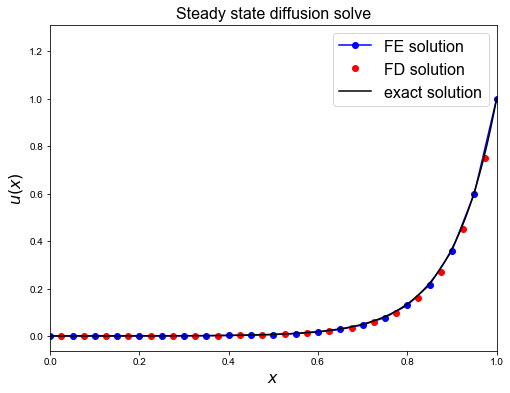

In [16]:
#set problem up
kappa = 0.005
L = 1
Pe = 10 
U = Pe * kappa / L
CE = 1
N_elements_CG = 20

#compute and plot FE approximation
x, u = adv_diff(N_elements_CG = 20, kappa = kappa, L = L, Pe = Pe, CE = CE)
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.plot(x, u, 'bo-', label='FE solution')

#compute and plot FD (central difference) approximation
x, C = BVP_AD_central(L, U, kappa, CE, N_elements_CG)
ax1.plot(x, C, 'ro', label='FD solution')

#compute and plot exact solution
x_fine = np.linspace(0, 1, 1000)
ax1.plot(x_fine, u_exact(x_fine), 'k-', label='exact solution')
ax1.legend(loc='best', fontsize=16);
ax1.set_xlim(0, 1)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$u(x)$', fontsize=16)
ax1.set_title('Steady state diffusion solve', fontsize=16)

Both FE and FD seem to (qualitatively) closely approximate the analytical solution. These methods are further compared below. 

Note that for FD, the solution is given at the middle of each interval of the mesh. On the other hand, with FE the solution is given at each node (including the boundaries).

### Convergence analysis (changes in $\Delta x$) - FD and FE approximations

A convergence analysis is performed by taking the 2-norm between the analytical solution and the FD and FE approximations for different $\Delta x$ values (ranging between 8 and 128).

The FD scheme being used is expected to be 1st order in space, while the FE scheme is expected to be 2nd order. To determine the order, a polynomial is fit to the errors as a function of $\Delta x$.


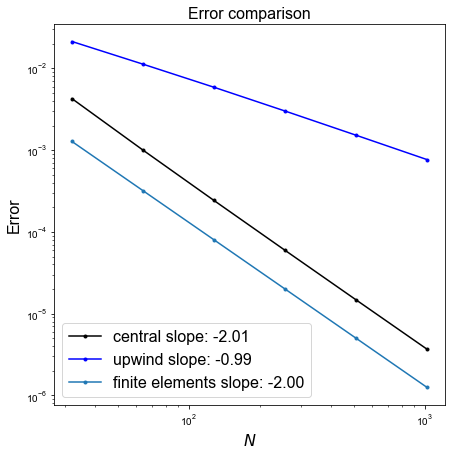

In [17]:
# set problem up
kappa = 0.005
L = 1
Pe = 10.
U = Pe * kappa / L
CE = 1

fig, ax1 = plt.subplots(1, 1, figsize=(7, 7))
def convergence_order(x_data, y_data):
    """  Gets np array in logarithmic form, calculates the slope at each interval and returns its last value""" 
    dx = np.diff(x_data)
    dy = np.diff(y_data)
    slope = dy/dx
    return slope[-1]


# create dx range and set up 
Ns = [32, 64, 128, 256, 512, 1024]
errors_central = np.zeros(len(Ns))
errors_upwind = np.zeros(len(Ns))
errors_fe = np.zeros(len(Ns))

# compute approximation (via FE and FD [central differences, upwind]) and calculate 2-norm 
for i, N in enumerate(Ns):
    x, u= adv_diff(N_elements_CG=N)
    errors_fe[i] = np.linalg.norm(u - u_exact(x)) / np.sqrt(len(u))  
    x, C = BVP_AD_central(L, U, kappa, CE, N)
    errors_central[i] = np.linalg.norm( C - u_exact(x) ) / np.sqrt(len(x))
    x, C = BVP_AD_upwind(L, U, kappa, CE, N)
    errors_upwind[i] = np.linalg.norm( C - u_exact(x) ) / np.sqrt(len(x))

# plotting 
ax1.loglog(Ns, errors_central, 'k.-', label = 'central slope: {:.2f}'.format(convergence_order(np.log(Ns), np.log(errors_central))))    
ax1.loglog(Ns, errors_upwind, 'b.-', label = 'upwind slope: {:.2f}'.format(convergence_order(np.log(Ns), np.log(errors_upwind)))) 
ax1.loglog(Ns, errors_fe, '.-', label = 'finite elements slope: {:.2f}'.format(convergence_order(np.log(Ns), np.log(errors_fe)))) 
ax1.set_xlabel('$N$', fontsize=16)
ax1.set_ylabel('Error', fontsize=16)
ax1.set_title('Error comparison', fontsize=16)
ax1.legend(loc='best', fontsize=16)

The plot above shows the expected order of convergence (2nd order for FE and central differences, 1st order for upwind differences). While FE and FD (central differences) converge at the same rate, finite elements results in a closer approximation to the exact solution for a certain N. 

# Coursework Q4 - Time-dependent advection-diffusion with the FEM

In this part of the question we want to solve unsteady advection-diffusion.

This time base your solution on the 1D (local) assembly based finite element solver we implemented in lecture 12 and **(1)** generalise it to include advection.

**(2)** Test your implementation using the same advection-diffusion of a Gaussian problem considered in
lecture 8 homework question 2 "An analytical solution to advection-diffusion" where I explained and demonstrated how an appropriate Gaussian function can be considered as an exact solution to the advection-diffusion problem as long as we initialise our solution with the Gaussian evaluated at some $t>0$  (since in the limit of  $t=0$   the solution is a Dirac-delta function), and use that same offset in time for the purpose of comparing the analytical solution with the numerical solution you obtain.


```python
def adv_diff_analytical_solution(U, kappa, x0, x, t):
    """ Analtical solution to advection-diffusion for an assumed 
    Dirac-delta initial condition at t=0.
    """
    return np.exp( -((x-x0) - U*t)**2 / (4.*kappa*t)) / np.sqrt(4. * np.pi * kappa * t)
```


We can then use the same function evaluated at the appropriate time as an exact solution to compare our numerical method against.
For this question you can consider the (non-periodic) domain $x\in[0,3]$ and you can assume **homogeneous Neumann boundary conditions**. Initialise the problem using the analytical solution centred initially at $x=0.5$ with an initial time for the purposes of evaluating the Gaussian function of $t=0.05$. Assume a velocity of 1 and a diffusivity of 0.01. Integrate the problem for a total time period of 1 [NB. I've purposefully set these values and the size of the domain so you don't need to worry about your Gaussian getting close to a boundary].

Perform some **(3)** experiments with different $\Delta x$ and $\Delta t$ values such that you can demonstrate the expected order of convergence in space and in time (for the time-stepping options of forward Euler, backward Euler and Crank-Nicolson). To do this I suggest you fix one of $\Delta x$ or $\Delta t$ and vary the other independently.

### Q4.1. Advection-diffusion via FE (1D (local) assembly method)

The problem to solve is the time-dependent advection diffusion, given by:

$$\frac{\partial u}{\partial t} +U \frac{\partial u}{\partial x} + \kappa\frac{\partial^2 u}{\partial x^2}=0, $$

it is assumed that $\kappa$ and $U$ are constant.

The weak form of this problem can be written as (ignoring boundary terms) [1]:
$$ \int_I \,\frac{\partial u}{\partial t}\,v\,dx + U\int_I \,u'\,v'\,dx+ \kappa\int_I \,u''\,v'\,dx = 0, \;\;\;\;\forall \;\; v\in V.$$

Substituting in our approximate solution function 

$$u_h := \sum_{j=0}^{n} u_j\,\phi_j,$$

restricting the test functions to the appropriate finite-dimensional space [1] ($v\in V_h$ with a basis given by $\phi_i$) yields the discrete system

\begin{align*} 
\sum_{j=0}^{n} \,\frac{\partial u_j}{\partial t}\, \int_0^1 \phi_j\, \phi_i \,dx  +  \kappa\sum_{j=0}^{n} u_j\, \int_0^1 \phi_j'\, \phi_i' \,dx + U\sum_{j=0}^{n} u_j\, \int_0^1 \phi_j'\, \phi_i \,dx &= 0\;\;\;\;\; \text{for}\;\;\;\; i = 0, 1,\ldots, n \\[10pt]
\iff
\sum_{j=0}^{n} \,\frac{d u_j}{d t} M_{i,j} + \kappa\sum_{j=0}^{n} u_j\, K_{ij} +  U\sum_{j=0}^{n} u_j\, A_{ij} &= 0, \;\;\;\;\; \text{for}\;\;\;\; i = 0, 1,\ldots, n.
\end{align*}

Or in matrix form

$$
M\, \frac{d \boldsymbol{u}}{d t} + \kappa\, K\,\boldsymbol{u} + U\, A\,\boldsymbol{u} = \boldsymbol{0},
$$

where $K$ is the discretisation matrix for diffusion, $M$ is the mass matrix (discretisation for time), and $A$ is the discretisation matrix for advection. At this stage we have semi-discretised in space using the "method of lines" approach [1].

To discretise in time we simply replace the time derivative with a finite difference approximation. Implementing the "theta" method allows one to choose between forward Euler, backward Euler or Crank-Nicolson. Consider the system:

$$
M \,\frac{\boldsymbol{u}^{n+1} - \boldsymbol{u}^{n}}{\Delta t} + (\kappa\, K\, + UA)\left(\theta \left(\boldsymbol{u}^{n+1} + (1-\theta)\boldsymbol{u}^{n}\right)\right) = \boldsymbol{0},
$$

which can be rearranged to 

$$ \left( M + \theta\,\Delta t \,\kappa\, K  + \theta\,\Delta t \,U\, A \right)  \boldsymbol{u}^{n+1} = \left( M - (1-\theta)\, \Delta t \,\kappa\, K  - (1-\theta)\, \Delta t \,U\, A \right) \boldsymbol{u}^{n}.$$

This matrix system is solved using a linear solver.

In [27]:
def adv_diff_analytical_solution(U, kappa, x0, x, t):
    """ Analytical solution to advection-diffusion for an assumed 
    Dirac-delta initial condition at t=0.
    """
    return np.exp( -((x-x0) - U*t)**2 / (4.*kappa*t)) / np.sqrt(4. * np.pi * kappa * t)

def generate_1D_CG_mesh(L, N_elements_CG, mesh_option=0):
    """ Function to generate a mesh given the domain size L
    (we assume the left hand entry is always at zero).
    
    Use N_elements_CG number of element.
    
    mesh_option==0 corresponds to a uniform mesh - only option implemented so far.
    
    Returns: the node locations x_node and the mesh spacing dx
    """
    if(mesh_option==0):
        x_nodes = np.linspace(0, L ,N_elements_CG+1)
    else:
        raise Exception('mesh_option != 0 not implemented yet')
    # given the mesh compute an array of element sizes
    dx = np.diff(x_nodes)
    return x_nodes, dx
t_start = 0.05
def connectivity(N_loc, N_elements_CG):
    """ Generate the connectivity matrix of dimension N_loc * N_elements_CG.
    
    Row corresponds to the local node number, column to the element number,
    the entry of the matrix is then a global node number.
    
    Returns: the connectivity matrix
    """
    connectivity_matrix = np.zeros((N_loc, N_elements_CG), dtype=int)
    if(N_loc==2):
        for element in range (N_elements_CG):
            connectivity_matrix[0, element] = element
            connectivity_matrix[1, element] = element + 1
    else:
        raise Exception('Only linear element (N_loc=2) implemented.')
    return connectivity_matrix

def shape(N_loc, N_gi):
    """ Define reference shape functions - their values at N_gi quadrature points.
    
    Only implemented for N_loc = 2, i.e. two nodes per element - linear basis functions.
    """ 
    assert(N_loc==2)
    phi = np.zeros( (N_loc, N_gi) )
    if(N_gi==2):
        phi[0,0] = 1.0 
        phi[0,1] = 0.0 
        phi[1,0] = 0.0 
        phi[1,1] = 1.0
    elif(N_gi==3):
        phi[0,0] = 1.0 
        phi[0,1] = 0.5 
        phi[0,2] = 0.0 
        phi[1,0] = 0.0 
        phi[1,1] = 0.5 
        phi[1,2] = 1.0        
    else:
        raise Exception('N_gi value not implemented.')
    return phi

def shape_derivatives(element, dx, N_loc, N_gi):
    """ Define derivatives of shape functions - their values at N_gi quadrature points
    over the reference element.
    
    Only implemented for N_loc = 2, i.e. two nodes per element - 
    linear basis functions.
    """   
    assert(N_loc==2)
    phi_x = np.zeros( (N_loc, N_gi) )
    # the derivatives of our linear basis functions over the reference element
    if(N_gi==2):
        phi_x[0,0] = -1. / 2.
        phi_x[0,1] =  phi_x[0,0] 
        phi_x[1,0] = -phi_x[0,0]  
        phi_x[1,1] =  phi_x[1,0]
    elif(N_gi==3):
        phi_x[0,0] = -1. / 2.
        phi_x[0,1] = phi_x[0,0] 
        phi_x[0,2] = phi_x[0,0] 
        phi_x[1,0] = -phi_x[0,0] 
        phi_x[1,1] = phi_x[1,0] 
        phi_x[1,2] = phi_x[1,0]            
    else:
        raise Exception('N_gi value not implemented.')
    # Jacobian contribution as seen/explained above due to the use of the chain rule
    phi_x = phi_x * (2. / dx[element]) 
    return phi_x

def quadrature(N_gi):
    """ Define quadrature rule on N_gi quadrature points.
    """    
    weight = np.zeros(N_gi)
    if(N_gi==2):  # Trapezoidal rule in 1D
        weight[0] = 0.5 
        weight[1] = 0.5
    elif(N_gi==3): # Simpson's rule in 1D
        weight[0] = 1. / 6. 
        weight[1] = 2. / 3. 
        weight[2] = 1. / 6.
    else:
        raise Exception('N_gi value not implemented.')
    return weight

def assembly_local(M, K, A, element, connectivity_matrix, N_loc, N_gi, weight, phi, phi_x, dx):
    """ Perform local assembly by looping over products of the local node numbers 
    (i.e. products of local basis functions), computing the required integrals, and 
    adding contributions to the correct locations of the global discretisation matrices.
    As we are solving the Diffusion problem we know we need the mass matrix M, and the 
    diffusion discretisation matrix K.  The current version of M and K are passed in here
    and the local contribitions added in to them.
    """
    ####################
    ### WATCH OUT! EDIT
    ####################
    for i_loc in range(N_loc):
        i_global = connectivity_matrix[i_loc, element]
        for j_loc in range(N_loc):
            j_global = connectivity_matrix[j_loc, element]
            # perform the quadrature - over one element with one "quadrature interval"
            # "weight" is the quadrature weight, e.g. 1/6, 4/6, 1/6 for Simpson's rule
            # and we need to remember to include the Jacobian determinant
            phi_phi = 0.
            phix_phix = 0.
            phi_phix = 0.
            for gi in range(N_gi):
                phi_phi += weight[gi] * phi[i_loc, gi] * phi[j_loc, gi] * dx[element] 
                phi_phix += weight[gi] * phi[i_loc, gi] * phi_x[j_loc, gi] * dx[element]
                phix_phix += weight[gi] * phi_x[i_loc, gi] * phi_x[j_loc, gi] * dx[element] 
            M[i_global, j_global] = M[i_global, j_global] + phi_phi 
            K[i_global, j_global] = K[i_global, j_global] + phix_phix 
            A[i_global, j_global] = A[i_global, j_global] + phi_phix 
            
            
def assembly_global(M, K, A, N_elements_CG, connectivity_matrix, N_loc, N_gi, weight, phi, dx):
    """ Perform global assembly by looping over elements.
    """
    # loop over all elements
    for element in range(N_elements_CG):
        # compute the derivatives of the basis function on this element
        phi_x = shape_derivatives(element, dx, N_loc, N_gi)
        # perform local assembly and update the M and K matrices
        assembly_local(M, K, A, element, connectivity_matrix, N_loc, N_gi, weight, phi, phi_x, dx)
        
def apply_bcs(A, b, lbc, rbc, bc_option=0):
    """Apply BCs using a big spring method.
    
    bc_option==0 Homogeneous Neumann
    bc_option==1 inhomogeneous Dirichlet
    """
    if(bc_option==0):
        return
    elif(bc_option==1):
        big_spring = 1.0e10
        A[0,0] = big_spring            
        b[0]   = big_spring * lbc
        A[-1,-1] = big_spring            
        b[-1]   = big_spring * rbc         
    else:
        raise Exception('bc option not implemented')
        
def initial_condition(x, IC_option=0):
    """ Function to define an initial condition on our mesh.
    """
    if(IC_option==0):
        return 1.0 * np.exp( -(x - 0.5)**2 / 0.005)
    else:
        raise Exception('Option not implemented.')  
        

def advec_diffuse(N_nodes_CG = 100, theta = 1/2, lbc = 0, rbc = 0, U = 1, kappa = 0.01, N = 1000, L = 3, dx = L/N, dt = 0.0025, t_start = 0.05, t_end = t_start + 1, x0 = 0.5):
    """ function that solves the time dependent advection-diffusion problem 
    using a finite element method (local assembly). 
    Returns the position of the nodes, the value of the solution at such locations and the analytical solution
    Takes in:
    theta: determines the numerical method used to integrate
    lbc, rbc: Boundary conditions
    N: number of points
    dt: time step
    t_start, t_end: bounds of time interval
    U: velocity
    kappa: diffusivity 
    L: length of domain
    Pe: peclet number
    CE = uR
    N_elements_CG: Number of elements to be used
    """
    t = np.arange(t_start, t_end, dt)
    xf = np.linspace(0, L, N)
    N_elements_CG = N_nodes_CG - 1
    Advec = np.zeros((N_nodes_CG, N_nodes_CG))
    x_nodes = np.linspace(0, 1 , N_nodes_CG+2 )
    dx = np.diff(x_nodes)
    dx[:] = 1
    Advec = np.diag(0 / dx[:-1], k=0) \
        + np.diag(-0.5 / dx[1:-1]  , k=-1) \
        + np.diag(0.5 / dx[1:-1]  , k=1)

    # define some numerical parameters
    N_loc = 2
    N_gi = 3
    u_ic = adv_diff_analytical_solution(U, kappa, x0, xf, t[0])
    #plt.plot(xf, u_ic, label = "Initial Condition")  
    # generate mesh
    x_nodes, dx = generate_1D_CG_mesh(L, N_elements_CG)
    connectivity_matrix = connectivity(N_loc, N_elements_CG)
    t = t_start
    #t_end = p #replaced by index#########################################
    #forward euler => theta = 1
    #trapezoidal => theta = 1/2
    #backward euler => theta = 0
    #theta = 1/2
    # we recall from an earlier lecture that for explicit time-stepping we should keep an 
    # eye on the size of the "r parameter"
    #print('r parameter: ', kappa*dt/(np.min(dx)**2))

    # set-up things we need for our discretisation
    # the basis functions defined on our reference element
    phi = shape(N_loc, N_gi)

    # quadrature weights
    weight = quadrature(N_gi)

    # allocate space to store our discretisation matrices
    M = np.zeros((N_nodes_CG, N_nodes_CG))
    K = np.zeros((N_nodes_CG, N_nodes_CG))
    A2 = np.zeros((N_nodes_CG, N_nodes_CG))
    # assemble the individual discretisation matrices
    assembly_global(M, K, A2, N_elements_CG, connectivity_matrix, N_loc, N_gi, weight, phi, dx)
    A = M + dt*theta*(kappa*K) + dt*theta*(U*Advec)
    # and combine them into our final matrix system
    
    RHS_matrix = M - dt*(1-theta)*(kappa*K) - dt*(1-theta)*(U*Advec)

    # and finally time step
    xf = np.linspace(0, L, N_nodes_CG)
    t2 = np.arange(t_start, t_end, dt)
    u_ic2 = adv_diff_analytical_solution(U, kappa, x0, xf, t2[0])
    u_old = np.copy(u_ic2)
    while t<t_end:
        b = RHS_matrix @ u_old.T 
        apply_bcs(A, b, lbc, rbc, bc_option=0)
        u = sl.solve(A, b)
        u_old = np.copy(u)
        t += dt
    u_analytical = adv_diff_analytical_solution(U, kappa, x0, xf, t_end)
    return u, xf, u_analytical

### Q4.2. Advection-diffusion via FE (1D (local) assembly method)
The implementation above is tested through the advection-diffusion of a Gaussian. The solution is approximated via FE using the local assembly method and compared to the analytical solution:
$$u(x, t) = \frac{e^{-\frac{((x-x_0)-Ut)^2}{4\kappa t}}}{\sqrt{4 \pi \kappa t}}$$
We can then use the same function evaluated at the appropriate time as an exact solution to compare our numerical method against.
Homogeneous Neumann boundary conditions are provided. The problem is initialised using the analytical solution centred initially at $x=0.5$. The first evaluation of the Gaussian function is at $t=0.05$. The velocity U is set to 1 and the diffusivity $\kappa$ to 0.01. The problem is integrated for a total time period of 1.

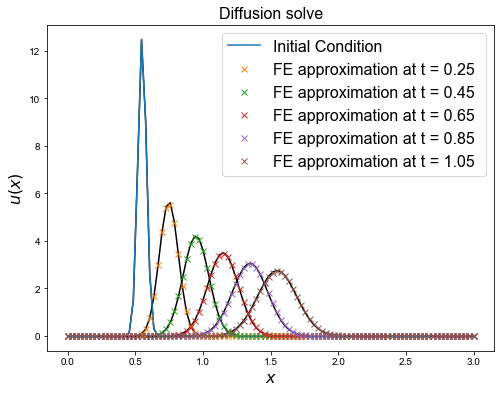

In [28]:
# set problem up
U = 1
kappa = 0.01
N = 100
L = 3
dx = L / N
dt = 0.0025
t_start = 0.05
t_end = t_start + 1.
x0 = 0.5
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)

t = np.arange(t_start, t_end, dt)

xf = np.linspace(0, L, N)
t_range = []

# calculate and plot analytical solution
for i, n in enumerate(np.linspace(0, int((t_end-t_start)/dt)-1, 6, dtype=int)):
    plt.plot(xf, adv_diff_analytical_solution(U, kappa, x0, xf, t[n]), 'k-')
    t_range.append(t[n])

N_nodes_CG = 100
N_elements_CG = N_nodes_CG - 1

Advec = np.zeros((N_nodes_CG, N_nodes_CG))
x_nodes = np.linspace(0, 1 , N_nodes_CG+2 )
dx = np.diff(x_nodes)
dx[:] = 1

# set up advection matrix
Advec = np.diag(0 / dx[:-1], k=0) \
    + np.diag(-0.5 / dx[1:-1]  , k=-1) \
    + np.diag(0.5 / dx[1:-1]  , k=1)

# define some numerical parameters
N_loc = 2
N_gi = 3
# generate and plot IC

u_ic = adv_diff_analytical_solution(U, kappa, x0, xf, t[0])
plt.plot(xf, u_ic, label = "Initial Condition")
for t_end in t_range[1:]:
    # generate mesh
    x_nodes, dx = generate_1D_CG_mesh(L, N_elements_CG)
    connectivity_matrix = connectivity(N_loc, N_elements_CG)
    t = t_start
    #forward euler => theta = 1
    #trapezoidal => theta = 1/2
    #backward euler => theta = 0
    theta = 1/2

    # the basis functions defined on our reference element
    phi = shape(N_loc, N_gi)

    # quadrature weights
    weight = quadrature(N_gi)

    # allocate space to store our discretisation matrices
    M = np.zeros((N_nodes_CG, N_nodes_CG))
    K = np.zeros((N_nodes_CG, N_nodes_CG))
    A2 = np.zeros((N_nodes_CG, N_nodes_CG))
    # assemble the individual discretisation matrices
    assembly_global(M, K, A2, N_elements_CG, connectivity_matrix, N_loc, N_gi, weight, phi, dx)

    # and combine them into our final matrix system
    A = M + dt*theta*(kappa*K) + dt*theta*(U*Advec)
    RHS_matrix = M - dt*(1-theta)*(kappa*K) - dt*(1-theta)*(U*Advec)

    # and finally time step
    u_old = np.copy(u_ic)
    while t<t_end:
        b = RHS_matrix @ u_old.T 
        apply_bcs(A, b, 0, 1, bc_option=0)
        u = sl.solve(A, b)
        u_old = np.copy(u)
        t += dt

    ax1.set_xlabel('$x$', fontsize=16)
    ax1.set_ylabel('$u(x)$', fontsize=16)
    ax1.set_title('Diffusion solve', fontsize=16)
    plt.plot(xf, u, 'x', label = "FE approximation at t = {:.2f} ".format(t_end)) #, label='FE solution'
    ax1.legend(loc='best', fontsize=16);

The plot above shows the solution to the Advection-Diffusion equation for the given parameters. The value of Theta is set to 1/2, which results in the explicit trapezoidal method for integration.  A Gaussian peak is set as initial condition at t = 0.05. The problem is solved by integrating up to t = 1.05. 

The FE elements approximation is shown for 5 different time intervals, corresponding to t = {0.25, 0.45, 0.65, 0.85, 1.05}. As it can be seen (qualitatively), the approximation seems to match the shape of the analytical solution. This holds for different values of velocity and diffusivity. 

The question of how this method performs compared to other (simpler) schemes such as Finite Differences is answered through a convergence analysis in the next section. 

### Q4.3. Convergence analysis (changes in $\Delta x$)

A convergence analysis is carried out to compare the performance of the Trapezoidal (theta = 1/2), forward Euler (theta = 1) and backward Euler (theta = 0) methods. 

This is done by studying the changes in the 2-norm between the analytical solution and the approximation as a function of the changes in dx. Meanwhile, dt is fixed. 

In [29]:
# set problem up
U = 1
kappa = 0.02
N = 100
L = 3
dx = L / N
dt = 0.0025
t_start = 0.05
t_end = t_start + 1.
x0 = 0.5

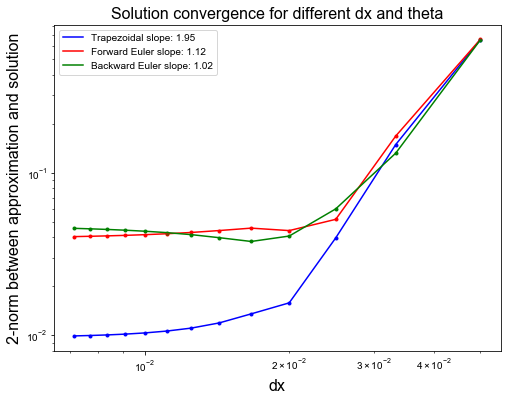

In [30]:
# set dx up
Ns = [10*p for p in range(2, 15)]
errors = np.zeros((3,len(Ns)))

# compute approximation via FE, BE, Trapz and compute 2-norm with analytical solution
for i, N in enumerate(Ns):
    u, xf, u_analytical = advec_diffuse(N_nodes_CG=N, theta = 1/2)
    errors[0,i] = sl.norm(u - u_analytical) / np.sqrt(len(u))    
    u, xf, u_analytical = advec_diffuse(N_nodes_CG=N, theta = 1)
    errors[1,i] = sl.norm(u - u_analytical) / np.sqrt(len(u)) 
    u, xf, u_analytical = advec_diffuse(N_nodes_CG=N, theta = 0)
    errors[2,i] = sl.norm(u - u_analytical) / np.sqrt(len(u))  

fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
dt_array = np.array(Ns)

# fitting and plotting 
start_fit = 0
Ns = np.divide(np.ones(len(Ns)), Ns)
line_fit_fe = np.polyfit(np.log(np.array(Ns)), np.log(errors[0,:]),1)
line_fit_ie = np.polyfit(np.log(np.array(Ns)), np.log(errors[1,:]), 1)
line_fit_be = np.polyfit(np.log(np.array(Ns)), np.log(errors[2,:]), 1)
ax1.loglog(np.array(Ns), errors[0,:], 'b.')
ax1.loglog(np.array(Ns), errors[1,:], 'r.')
ax1.loglog(np.array(Ns), errors[2,:], 'g.')
ax1.loglog(np.array(Ns), errors[0,:],  'b', label='Trapezoidal slope: {:.2f}'.format(line_fit_fe[0]))
ax1.loglog(np.array(Ns), errors[1,:], 'r', label='Forward Euler slope: {:.2f}'.format(line_fit_ie[0]))
ax1.loglog(np.array(Ns), errors[2,:], 'g', label='Backward Euler slope: {:.2f}'.format(line_fit_be[0]))
ax1.set_xlabel('dx', fontsize=16)
ax1.set_ylabel('2-norm between approximation and solution', fontsize=16)
ax1.set_title('Solution convergence for different dx and theta', fontsize=16)
ax1.legend(loc='best', fontsize=16);
ax1.legend()

The plot above shows that the Trapezoidal method converges to a better approximation to the analytical solution. 

Furthermore, it shows that for this particular problem a dx smaller than 2e-2 does not lead to a better approximation despite introducing unwanted computational overhead. 

The forward and backward Euler methods are expected to be of 1st order, while the trapezoidal method is expected to be 2nd order [1]. The results above seem non-linear as the error flattens when the numerical approximation gets very close to the analytical solution. However, they seem to display a rate of convergence of around 1, 1 and 2 (for backward Euler, forward Euler and trapezoidal, respectively). 

### Q4.4. Convergence analysis (changes in $\Delta t$)

The time derivative is approximated by a forward difference. This is a 1st order method. Further work could involve using an approximation for the time derivative that has a higher convergence rate.

A convergence analysis is performed to confirm that the numerical approximation converges to the analytical solution at the expected rate. This is done by taking the 2-norm between these two, and exploring how it varies as a function of changes in dt. Meanwhile, dx is fixed. 

Note that the matrix system to be solved involves terms that contain the product of dt, U and k. This means that different values of these parameters might lead to different convergence behaviours for a certain dt range.

Three methods are tested: forward and backward Euler, and trapezoidal. Even though these methods might lead to different errors, the convergence rate should be of 1 for all 3 as it is independent of theta (which determines the method). 

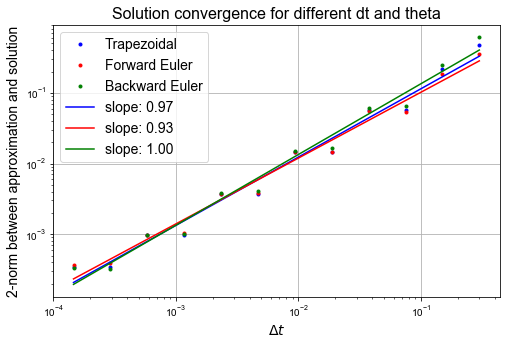

In [31]:
def f(t, u):
    val = u
    return val

# problem parameters
dt = 0.04
u0 = 1.0
t0 = 0.0

    #forward euler => theta = 1
    #trapezoidal => theta = 1/2
    #backward euler => theta = 0
 
def approx_error(dt):
    # calculates 2-norm between approximation and analytical solution for FD and Trapz methods
    u, xf, u_analytical = advec_diffuse(x0 = 0.5, t_start = 1, theta = 1/2, dt = dt, kappa = 0.008, U = 0.5) 
    err1 = sl.norm(u - u_analytical) / np.sqrt(len(u)) 
    u, xf, u_analytical = advec_diffuse(x0 = 0.5, t_start = 1, theta = 1, dt = dt, kappa = 0.008, U = 0.5) 
    err2 = sl.norm(u - u_analytical) / np.sqrt(len(u)) 
    return err1, err2
def approx_error2(dt):
    # calculates 2-norm between approximation and analytical solution for BD method
    u, xf, u_analytical = advec_diffuse(x0 = 0.5, t_start = 1, theta = 0, dt = dt, kappa = 0.008, U = 0.5) 
    err3 = sl.norm(u - u_analytical) / np.sqrt(len(u)) 
    return err3

error_fe = []
error_ie = []
error_te = []
dt_array = []

# (in range dt = [1e-4, 0.3]) calculate 2-norm between approximation and analytical solution for FD and Trapz methods
dt = 0.3
while dt > 1.e-4:
    dt_array.append(dt)
    err1, err2 = approx_error(dt)
    error_fe.append(err1)
    error_ie.append(err2)
    dt *= 0.5
    
# (in range dt = [1e-2, 0.3]) calculate 2-norm between approximation and analytical solution for BD method
dt_array2 = []
dt = 0.3
while dt > 1.e-4:
    dt_array2.append(dt)
    err3 = approx_error2(dt)
    error_te.append(err3)
    dt *= 0.5

# fitting and plotting 
fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))
ax1.loglog(dt_array, error_fe, 'b.', label='Trapezoidal')
ax1.loglog(dt_array, error_ie, 'r.', label='Forward Euler')
ax1.loglog(dt_array2, error_te, 'g.', label='Backward Euler')
ax1.set_xlabel('$\Delta t$', fontsize=14)
ax1.set_ylabel('2-norm between approximation and solution', fontsize=14)
ax1.set_title('Solution convergence for different dt and theta', fontsize=16)
ax1.grid(True)
start_fit = 0
line_fit_fe = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_fe[start_fit:]), 1)
line_fit_ie = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_ie[start_fit:]), 1)
line_fit_te = np.polyfit(np.log(dt_array2[start_fit:]), np.log(error_te[start_fit:]), 1)
ax1.loglog(dt_array, np.exp(line_fit_fe[1]) * dt_array**(line_fit_fe[0]), 'b', label = 'slope: {:.2f}'.format(line_fit_fe[0]))
ax1.loglog(dt_array, np.exp(line_fit_ie[1]) * dt_array**(line_fit_ie[0]),  'r', label = 'slope: {:.2f}'.format(line_fit_ie[0]))
ax1.loglog(dt_array2, np.exp(line_fit_te[1]) * dt_array2**(line_fit_te[0]), 'g',  label = 'slope: {:.2f}'.format(line_fit_te[0]))
ax1.legend(loc='best', fontsize=14);

The plot above shows that both forward and backward Euler, and improved trapezoidal converge at a similar rate. This rate seems to be close to 1. Thd plot matches the expectated result: Regardless of the method, the rate of convergence is similar (and close to 1) since the time derivative is being approximated with a forward difference.

Furthermore, some interesting features have been observed while producing the convergence plot above. 
Since the system to be solved contains terms where dt multiplies the diffusivity and the velocity, these two parameters impact the convergence study. For example, for a diffusivity of 0.01 and a velocity of 1, backward euler diverges for dt > 0.01. 

## References & Bibliography

[1] M. Piggott, ACSE-3, (2019), GitHub repository, https://github.com/acse-2019/ACSE-3

[2] "Conservation of energy", Physics.bu.edu, 2020. [Online]. Available: http://physics.bu.edu/~duffy/py105/EnergyConservation.html. [Accessed: 03- Jan- 2020].

[3] "Module 3 -- Mechanical Energy of Orbits - PER wiki", Scripts.mit.edu, 2020. [Online]. Available: https://scripts.mit.edu/~srayyan/PERwiki/index.php?title=Module_3_--_Mechanical_Energy_of_Orbits. [Accessed: 03- Jan- 2020].

[4] O. Amali and N. N. Agwu, "Finite element method for solving the advection-diffusion equation," 2017 13th International Conference on Electronics, Computer and Computation (ICECCO), Abuja, 2017, pp. 1-3.

[5] I. Boztosun, A. Charafi, "An analysis of the linear advection-diffusion equation using mesh-free and mesh-dependent methods", Engineering Analysis with Boundary Elements, vol. 26, pp. 889-895, 2002.

[6] P. Nithiarasu, R. W. Lewis, K. N. Seetharamu, Fundamentals of the Finite Element Method for Heat and Mass Transfer, John Wiley & Sons, 2016.